In [3]:
pip install gseapy

  Obtaining dependency information for gseapy from https://files.pythonhosted.org/packages/42/ee/b43d664c76d245d7b4df365a30dc434e4042c22cbd79f3887efdf57f4818/gseapy-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 18.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gseapy
import pandas as pd
from gseapy import barplot, dotplot

In [121]:


# Read CSV file
master = pd.read_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/master_combined_DEG_list_all_celltypes.csv")



In [92]:
master.head()

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,type
0,NOC2L,0.468260,-0.335645,0.832711,-0.403074,0.686894,0.999827,Activated memory B cell,BR1,Y1,DEGs_Male
1,ISG15,0.771676,0.031020,0.532948,0.058204,0.953586,0.999827,Activated memory B cell,BR2,Y1,DEGs_Male
2,SDF4,0.563181,0.012470,0.651063,0.019153,0.984719,0.999827,Activated memory B cell,BR2,Y1,DEGs_Male
3,B3GALT6,0.315174,0.618455,0.877990,0.704399,0.481184,0.999827,Activated memory B cell,BR2,Y1,DEGs_Male
4,UBE2J2,0.451714,0.177616,0.652815,0.272078,0.785562,0.999827,Activated memory B cell,BR2,Y1,DEGs_Male


# IL1B + Cd14 mono

In [188]:
# Filter data
master_1 = master[(master['celltype'] == 'IL1B+ CD14 monocyte') & 
                  (master['padj'] <= 0.1) & 
                  (master['type'] == 'DEGs_Male')]

# Extract gene list
gl = master_1['X']
print(gl)

Series([], Name: X, dtype: object)


In [189]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/IL1B_CD14 monocyte_split_M_vs_F/IL1B_CD14 monocyte_DEGS_male_padj0.1.csv", index=False)


In [66]:
# assign a list object to enrichr
#gl = ["BCL6", "IL1B", "NLRP3", "METRNL", "PTGS2", "TNF", "TNFRSF1B"]


enrich_reseult = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023', outdir='test')


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [67]:
enrich_reseult.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Neuroinflammatory Response (GO:0...,4/19,4.207742e-09,0.000001,0,0,295.748148,5703.899269,IL1B;PTGS2;TNFRSF1B;TNF
1,GO_Biological_Process_2023,Regulation Of Inflammatory Response (GO:0050727),7/240,4.801996e-09,0.000001,0,0,39.546495,757.482824,BCL6;IL1B;NLRP3;METRNL;PTGS2;TNFRSF1B;TNF
2,GO_Biological_Process_2023,Positive Regulation Of Membrane Protein Ectodo...,3/14,4.171558e-07,0.000060,0,0,286.607656,4210.210854,IL1B;TNFRSF1B;TNF
3,GO_Biological_Process_2023,Positive Regulation Of Acute Inflammatory Resp...,3/14,4.171558e-07,0.000060,0,0,286.607656,4210.210854,IL1B;PTGS2;TNF
4,GO_Biological_Process_2023,Extrinsic Apoptotic Signaling Pathway (GO:0097...,4/67,8.038553e-07,0.000093,0,0,70.246914,985.834410,BCL2A1;G0S2;TNFRSF1B;TNF
5,GO_Biological_Process_2023,Regulation Of Membrane Protein Ectodomain Prot...,3/21,1.516663e-06,0.000146,0,0,175.087719,2345.999993,IL1B;TNFRSF1B;TNF
6,GO_Biological_Process_2023,Positive Regulation Of Protein Catabolic Proce...,4/92,2.878102e-06,0.000237,0,0,50.227273,640.818609,IL1B;TNFRSF1B;TNF;OAZ1
7,GO_Biological_Process_2023,Positive Regulation Of Nitric Oxide Biosynthet...,3/27,3.321317e-06,0.000238,0,0,131.276316,1656.070319,IL1B;PTGS2;TNF
8,GO_Biological_Process_2023,Positive Regulation Of Nitric Oxide Metabolic ...,3/28,3.717229e-06,0.000238,0,0,126.018947,1575.555919,IL1B;PTGS2;TNF
9,GO_Biological_Process_2023,Cellular Response To Lipopolysaccharide (GO:00...,4/124,9.442759e-06,0.000511,0,0,36.774074,425.485684,IL1B;NLRP3;TNFRSF1B;TNF


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


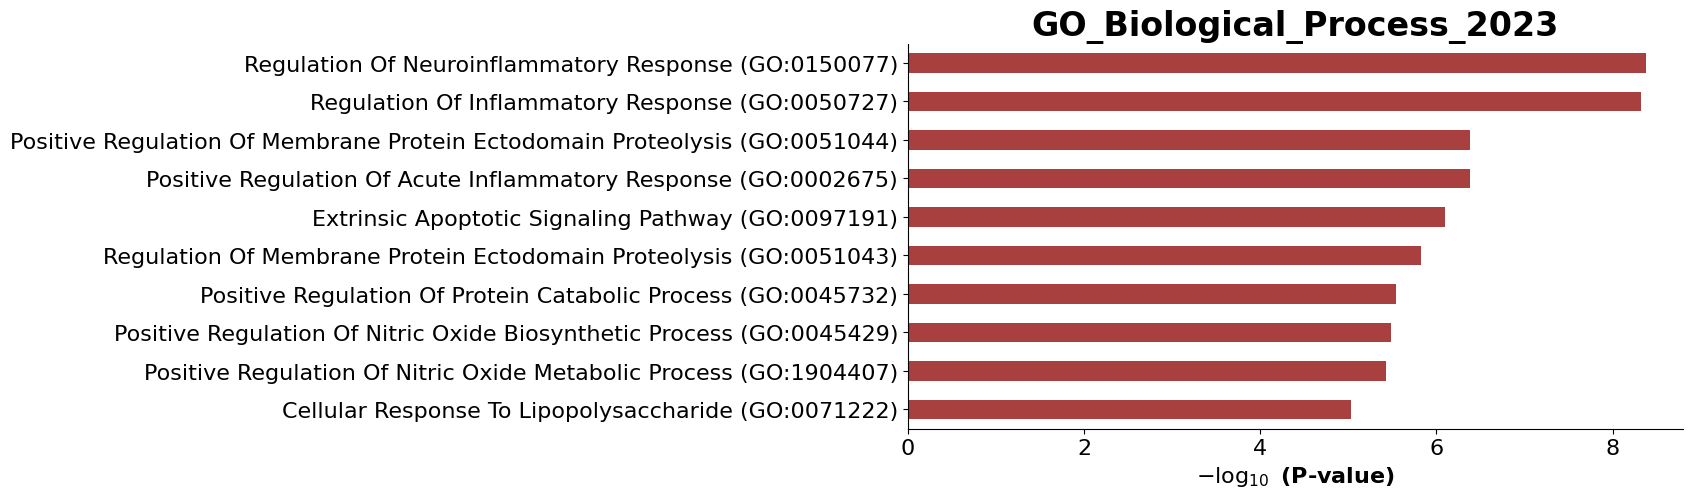

In [68]:
ax = barplot(enrich_reseult.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column= 'P-value')

# Core Cd14 mono

In [193]:
# Filter data
master_1 = master[(master['celltype'] == 'Core CD14 monocyte') & 
                  (master['padj'] <= 0.1) & 
                  (master['type'] == 'DEGs_Female')]

# Extract gene list
gl = master_1['X']
print(gl)

481104      SFXN3
481105    PAK1IP1
481106     SCAMP2
481107     CD300E
481108     RAD23A
           ...   
481189      RC3H2
481190    CFAP298
481191      CEBPZ
481192       DCXR
481193      UTP11
Name: X, Length: 90, dtype: object


In [194]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/Core CD14 monocyte_split_M_vs_F/Core_CD14 monocyte_DEGS_Female_padj0.1.csv", index=False)


In [75]:
# assign a list object to enrichr
#gl = ['TRIM8', 'TP53INP1', 'ZSWIM8', 'FURIN', 'TRIM38', 'FOXO1']


enrich_result = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023', outdir='test')


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [76]:
enrich_result.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of Cellular Catabolic Proc...,6/146,0.000051,0.041380,0,0,10.086735,99.627144,TRIM8;TP53INP1;ZSWIM8;FURIN;TRIM38;FOXO1
1,GO_Biological_Process_2023,Polyadenylation-Dependent snoRNA 3'-End Proces...,2/6,0.000297,0.073892,0,0,113.102273,918.640025,EXOSC5;EXOSC4
2,GO_Biological_Process_2023,Gene Expression (GO:0010467),7/296,0.000379,0.073892,0,0,5.725893,45.102655,EXOSC5;DDX39A;EXOSC4;MRPS18B;FURIN;SORL1;HSPD1
3,GO_Biological_Process_2023,U4 snRNA 3'-End Processing (GO:0034475),2/7,0.000414,0.073892,0,0,90.477273,704.697251,EXOSC5;EXOSC4
4,GO_Biological_Process_2023,Ribosome Biogenesis (GO:0042254),5/155,0.000678,0.073892,0,0,7.749020,56.538799,EXOSC5;EXOSC4;UTP11;PAK1IP1;UTP18
5,GO_Biological_Process_2023,Nuclear mRNA Surveillance (GO:0071028),2/9,0.000706,0.073892,0,0,64.620130,468.853346,EXOSC5;EXOSC4
6,GO_Biological_Process_2023,Regulation Of Peptidyl-Tyrosine Phosphorylatio...,4/90,0.000729,0.073892,0,0,10.721471,77.445698,RAP2B;TNK2;ITGB2;PECAM1
7,GO_Biological_Process_2023,Nuclear RNA Surveillance (GO:0071027),2/10,0.000880,0.073892,0,0,56.539773,397.775222,EXOSC5;EXOSC4
8,GO_Biological_Process_2023,"Nuclear-Transcribed mRNA Catabolic Process, Ex...",2/10,0.000880,0.073892,0,0,56.539773,397.775222,EXOSC5;EXOSC4
9,GO_Biological_Process_2023,Negative Regulation Of BMP Signaling Pathway (...,3/43,0.000955,0.073892,0,0,17.129310,119.119679,SKI;GPR155;SORL1


In [77]:
from gseapy import barplot, dotplot

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


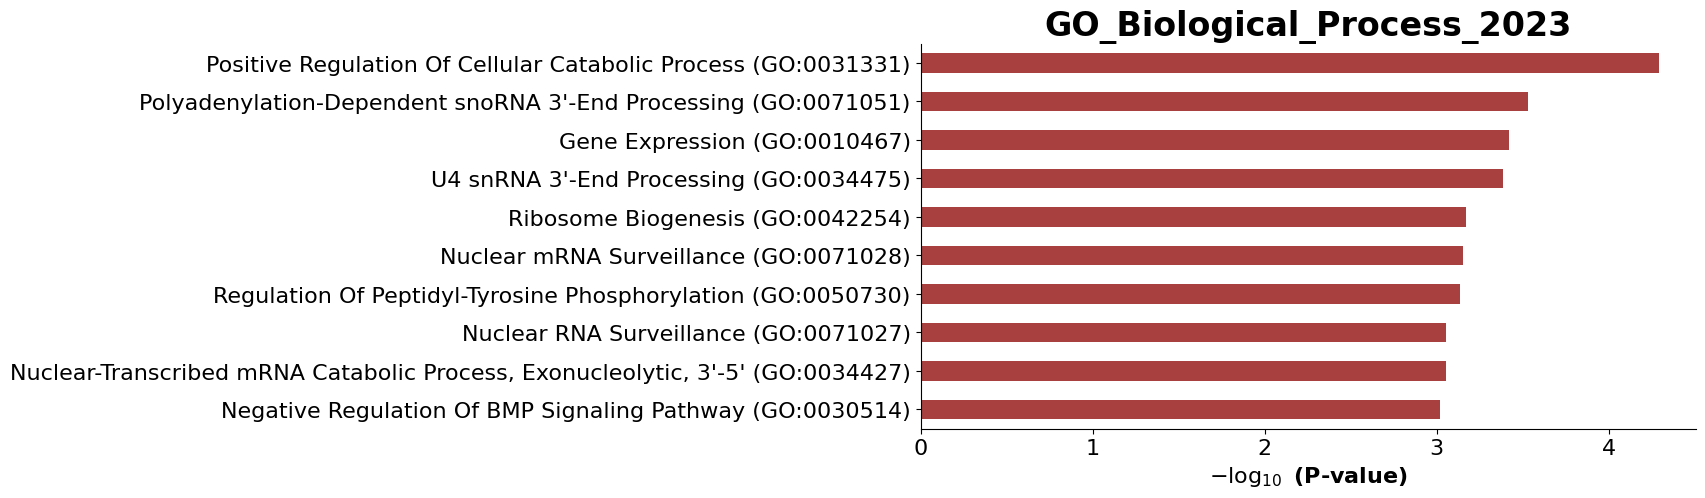

In [78]:
ax = barplot(enrich_result.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column = "P-value" )

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


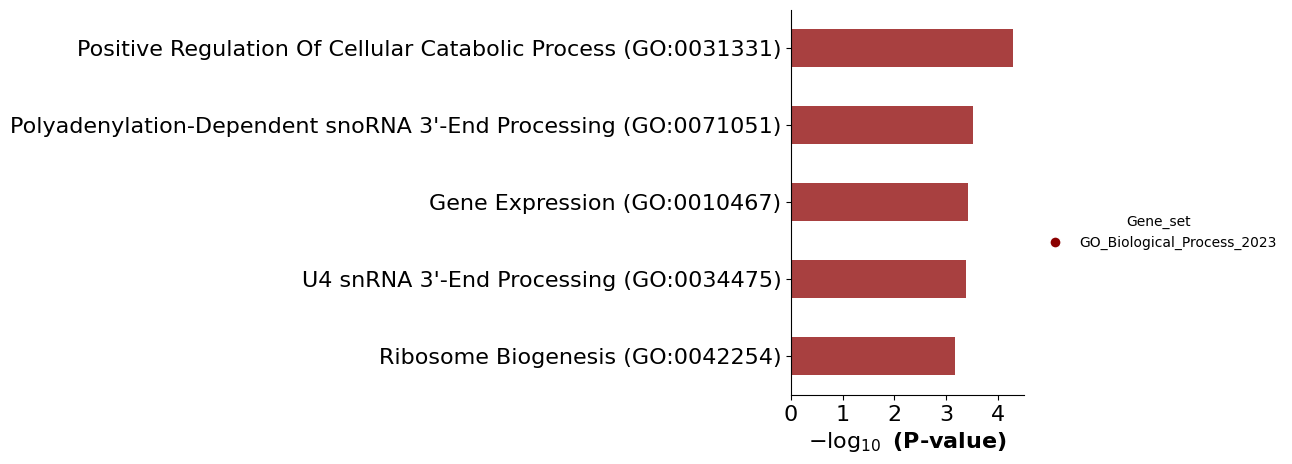

In [63]:
ax = barplot(enrich_result.results,
              column="P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              color='darkred', # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

# ISG+ Cd14 mono

In [197]:
# Filter data
master_1 = master[(master['celltype'] == 'ISG+ CD14 monocyte') & 
                  (master['padj'] <= 0.1) & 
                  (master['type'] == 'DEGs_Male')]

# Extract gene list
gl = master_1['X']
print(gl)

215480      EVI2A
215481       ABI3
215482    CARHSP1
215483      EIF5A
215484    SAP30BP
215485      SCNM1
215486      DNPH1
215487       GSAP
215488     RB1CC1
215489      BANF1
215490        HCK
Name: X, dtype: object


In [198]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/ISG_CD14 monocyte_split_M_vs_F/ISG_CD14 monocyte_DEGS_Male_padj0.1.csv", index=False)


In [87]:
# assign a list object to enrichr
#gl = ['TRIM8', 'TP53INP1', 'ZSWIM8', 'FURIN', 'TRIM38', 'FOXO1']


enrich_result = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023')


In [88]:
enrich_result.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Second-Messenger-Mediated Signaling (GO:0019932),2/72,0.001678,0.06745,0,0,37.929524,242.366850,FCGR3A;NUDT4
1,GO_Biological_Process_2023,Calcium-Mediated Signaling (GO:0019722),2/85,0.002329,0.06745,0,0,31.967871,193.798561,FCGR3A;NUDT4
2,GO_Biological_Process_2023,Negative Regulation Of Erythrocyte Differentia...,1/5,0.004243,0.06745,0,0,312.171875,1705.223501,MAFB
3,GO_Biological_Process_2023,Natural Killer Cell Degranulation (GO:0043320),1/5,0.004243,0.06745,0,0,312.171875,1705.223501,FCGR3A
4,GO_Biological_Process_2023,Glomerulus Vasculature Development (GO:0072012),1/5,0.004243,0.06745,0,0,312.171875,1705.223501,PECAM1
5,GO_Biological_Process_2023,Neutrophil Extravasation (GO:0072672),1/5,0.004243,0.06745,0,0,312.171875,1705.223501,PECAM1
6,GO_Biological_Process_2023,Copper Ion Import (GO:0015677),1/6,0.005090,0.06745,0,0,249.725000,1318.679916,SLC31A2
7,GO_Biological_Process_2023,Positive Regulation Of Adipose Tissue Developm...,1/7,0.005936,0.06745,0,0,208.093750,1066.850192,SORL1
8,GO_Biological_Process_2023,Positive Regulation Of Endocytic Recycling (GO...,1/7,0.005936,0.06745,0,0,208.093750,1066.850192,SORL1
9,GO_Biological_Process_2023,Regulation Of Protein Localization To Early En...,1/8,0.006781,0.06745,0,0,178.357143,890.652175,SORL1


In [89]:
from gseapy import barplot, dotplot

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


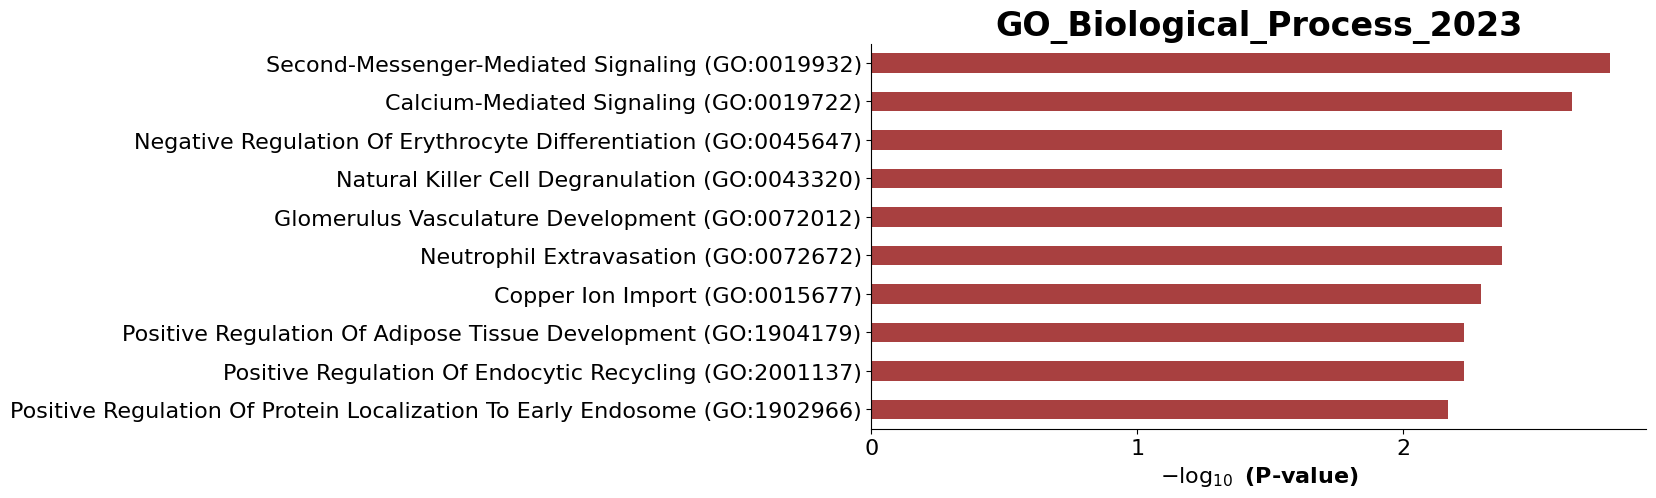

In [90]:
ax = barplot(enrich_result.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column = 'P-value')

# IL1B + Cd14 mono - split by BR1 and BR2

In [1]:
# Filter data
master_1 = master[(master['celltype'] == 'IL1B+ CD14 monocyte') & 
                  (master['padj'] <= 0.1) & 
                  (master['type'] == 'DEGs_Female')&
                  ( master['Direction'] == 'BR2')]

# Extract gene list
gl = master_1['X']
print(gl)

NameError: name 'master' is not defined

In [202]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/IL1B_CD14 monocyte_split_M_vs_F_upin_BR1_BR2/IL1B_CD14 monocyte_DEGS_Male_UpinBR2_padj0.1.csv", index=False)


In [206]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/IL1B_CD14 monocyte_split_M_vs_F_upin_BR1_BR2/IL1B_CD14 monocyte_DEGS_Female_UpinBR2_padj0.1.csv", index=False)


In [133]:
# assign a list object to enrichr
#gl = ["BCL6", "IL1B", "NLRP3", "METRNL", "PTGS2", "TNF", "TNFRSF1B"]


enrich_reseult = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023')


In [134]:
enrich_reseult.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Inflammatory Response (GO:0050727),7/240,1.462972e-09,6.265108e-07,0,0,49.440629,1005.760649,BCL6;IL1B;NLRP3;METRNL;TNFRSF1B;PTGS2;TNF
1,GO_Biological_Process_2023,Regulation Of Neuroinflammatory Response (GO:0...,4/19,2.233550e-09,6.265108e-07,0,0,354.951111,7070.510247,IL1B;PTGS2;TNFRSF1B;TNF
2,GO_Biological_Process_2023,Positive Regulation Of Membrane Protein Ectodo...,3/14,2.628066e-07,3.685863e-05,0,0,340.397727,5157.654422,IL1B;TNFRSF1B;TNF
3,GO_Biological_Process_2023,Positive Regulation Of Acute Inflammatory Resp...,3/14,2.628066e-07,3.685863e-05,0,0,340.397727,5157.654422,IL1B;PTGS2;TNF
4,GO_Biological_Process_2023,Extrinsic Apoptotic Signaling Pathway (GO:0097...,4/67,4.291689e-07,4.815276e-05,0,0,84.308995,1236.089175,BCL2A1;G0S2;TNFRSF1B;TNF
5,GO_Biological_Process_2023,Regulation Of Membrane Protein Ectodomain Prot...,3/21,9.562455e-07,8.940895e-05,0,0,207.947917,2882.210357,IL1B;TNFRSF1B;TNF
6,GO_Biological_Process_2023,Positive Regulation Of Protein Catabolic Proce...,4/92,1.541202e-06,1.235163e-04,0,0,60.281818,806.748431,IL1B;TNFRSF1B;TNF;OAZ1
7,GO_Biological_Process_2023,Positive Regulation Of Nitric Oxide Biosynthet...,3/27,2.095481e-06,1.462050e-04,0,0,155.914062,2038.689756,IL1B;PTGS2;TNF
8,GO_Biological_Process_2023,Positive Regulation Of Nitric Oxide Metabolic ...,3/28,2.345534e-06,1.462050e-04,0,0,149.670000,1940.171828,IL1B;PTGS2;TNF
9,GO_Biological_Process_2023,Cellular Response To Lipopolysaccharide (GO:00...,4/124,5.075973e-06,2.847621e-04,0,0,44.135556,538.056220,IL1B;NLRP3;TNFRSF1B;TNF


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


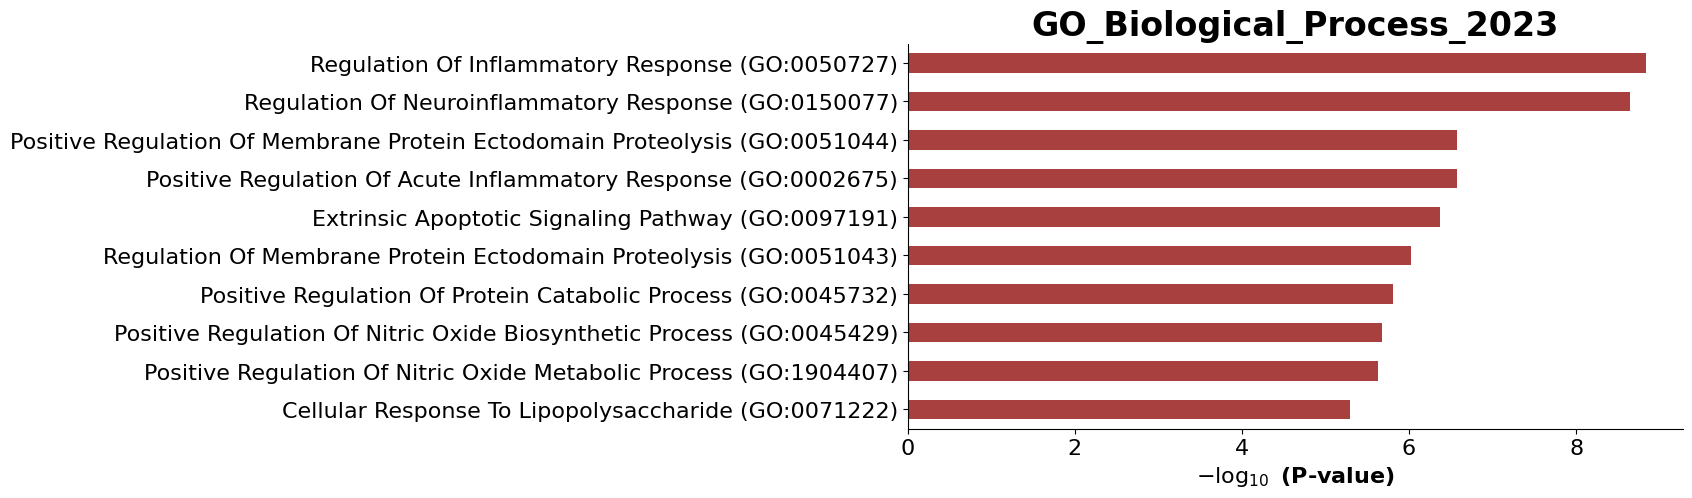

In [103]:
#BR2
ax = barplot(enrich_reseult.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column= 'P-value')

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


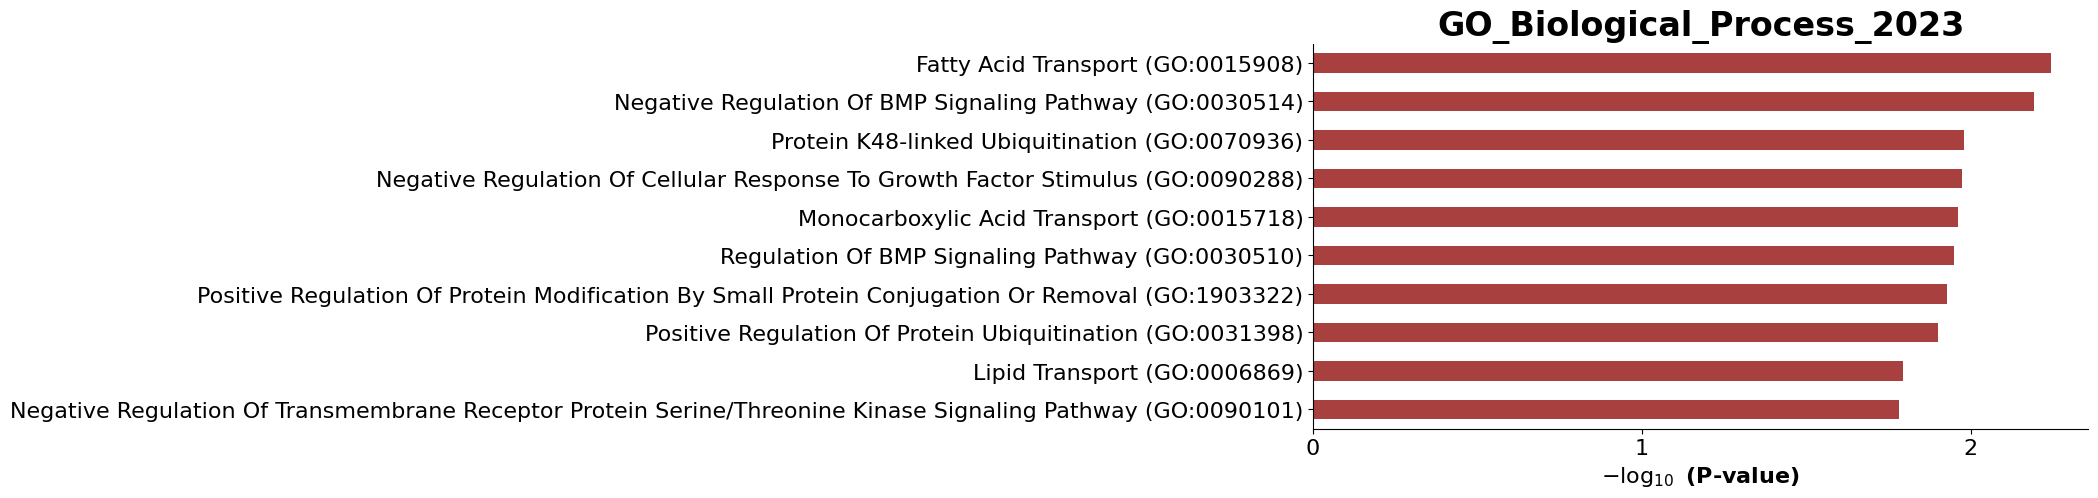

In [99]:
#BR1
ax = barplot(enrich_reseult.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column= 'P-value')

# Core Cd14 mono - split by BR1 and BR2

In [213]:
# Filter data
master_1 = master[(master['celltype'] == 'Core CD14 monocyte') & 
                  (master['padj'] <= 0.1) & 
                  (master['type'] == 'DEGs_Male') &
                  ( master['Direction'] == 'BR1')]

# Extract gene list
gl = master_1['X']
print(gl)

108696    PFDN6
108697     GSAP
108699     CINP
108701    DNPH1
Name: X, dtype: object


In [214]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/Core_CD14 monocyte_split_M_vs_F_upin_BR1_BR2/Core_CD14 monocyte_DEGS_Male_UpinBR1_padj0.1.csv", index=False)


In [210]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/Core_CD14 monocyte_split_M_vs_F_upin_BR1_BR2/Core_CD14 monocyte_DEGS_Female_UpinBR2_padj0.1.csv", index=False)


In [147]:
# assign a list object to enrichr
#gl = ['TRIM8', 'TP53INP1', 'ZSWIM8', 'FURIN', 'TRIM38', 'FOXO1']


enrich_result = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023', outdir='test')


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [148]:
enrich_result.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of Cellular Catabolic Proc...,6/146,0.000002,0.001071,0,0,18.454658,241.203315,TRIM8;TP53INP1;ZSWIM8;FURIN;TRIM38;FOXO1
1,GO_Biological_Process_2023,Positive Regulation Of Autophagy (GO:0010508),4/107,0.000172,0.032188,0,0,16.055825,139.168591,TRIM8;TP53INP1;TRIM38;FOXO1
2,GO_Biological_Process_2023,Negative Regulation Of BMP Signaling Pathway (...,3/43,0.000190,0.032188,0,0,30.471429,261.080193,SKI;GPR155;SORL1
3,GO_Biological_Process_2023,Positive Regulation Of Viral Entry Into Host C...,2/12,0.000430,0.043724,0,0,79.752000,618.149734,FURIN;TRIM38
4,GO_Biological_Process_2023,Positive Regulation By Symbiont Of Entry Into ...,2/12,0.000430,0.043724,0,0,79.752000,618.149734,FURIN;TRIM38
5,GO_Biological_Process_2023,Negative Regulation Of Cellular Response To Gr...,3/71,0.000836,0.070812,0,0,17.899160,126.841563,SKI;GPR155;SORL1
6,GO_Biological_Process_2023,Regulation Of BMP Signaling Pathway (GO:0030510),3/75,0.000981,0.071186,0,0,16.901361,117.076328,SKI;GPR155;SORL1
7,GO_Biological_Process_2023,Positive Regulation Of Viral Life Cycle (GO:19...,2/22,0.001481,0.089838,0,0,39.856000,259.652630,FURIN;TRIM38
8,GO_Biological_Process_2023,Regulation Of Peptidyl-Tyrosine Phosphorylatio...,3/90,0.001660,0.089838,0,0,13.976777,89.460702,RAP2B;TNK2;PECAM1
9,GO_Biological_Process_2023,Positive Regulation Of Protein Catabolic Proce...,3/92,0.001768,0.089838,0,0,13.661316,86.580552,FURIN;SORL1;FOXO1


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


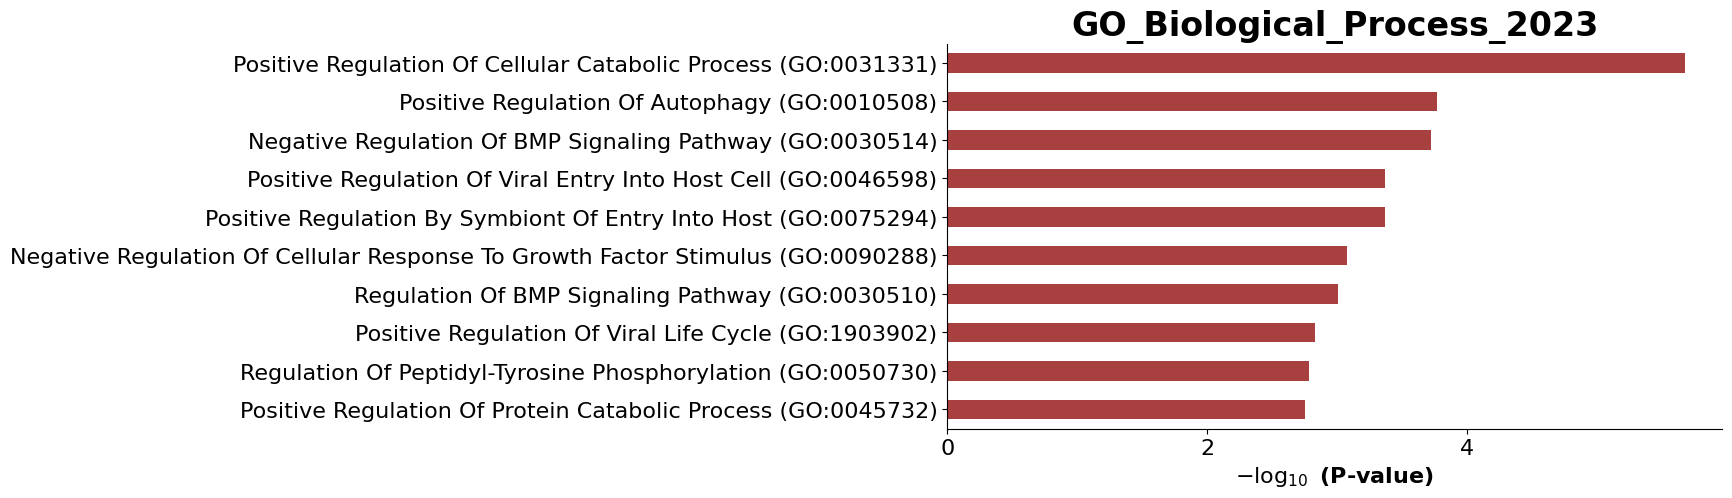

In [149]:
#BR2
ax = barplot(enrich_result.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column = "P-value" )

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


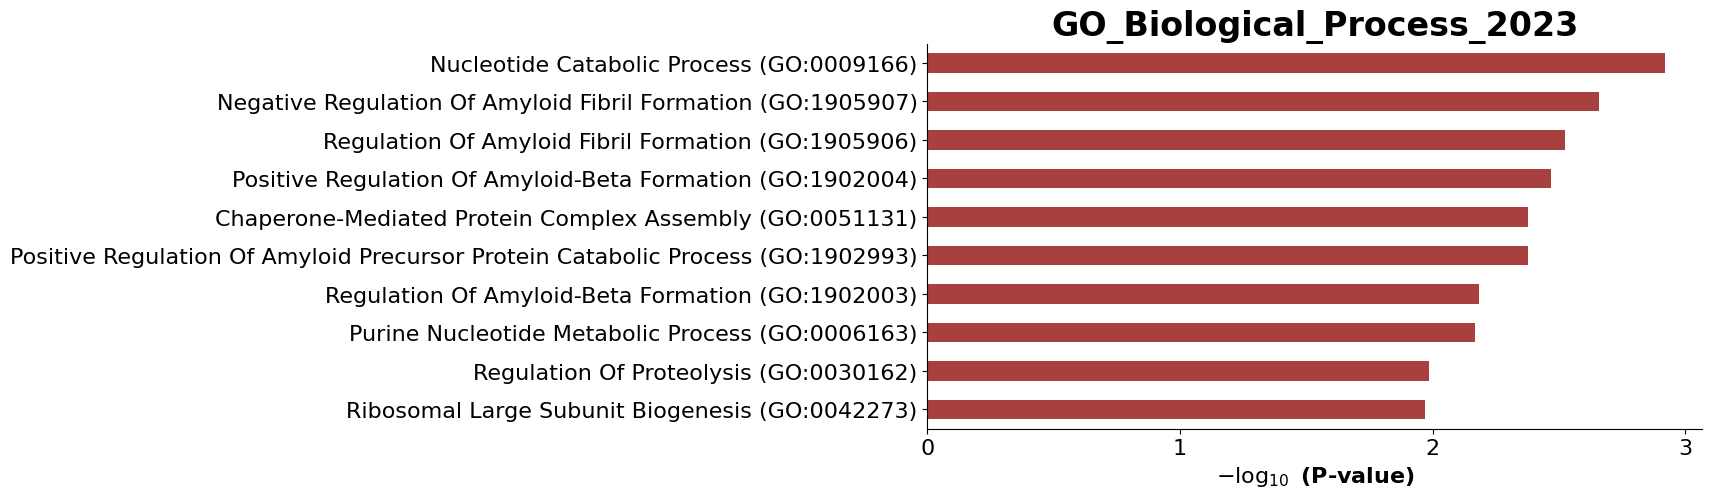

In [128]:
#BR1
ax = barplot(enrich_result.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column = "P-value" )

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


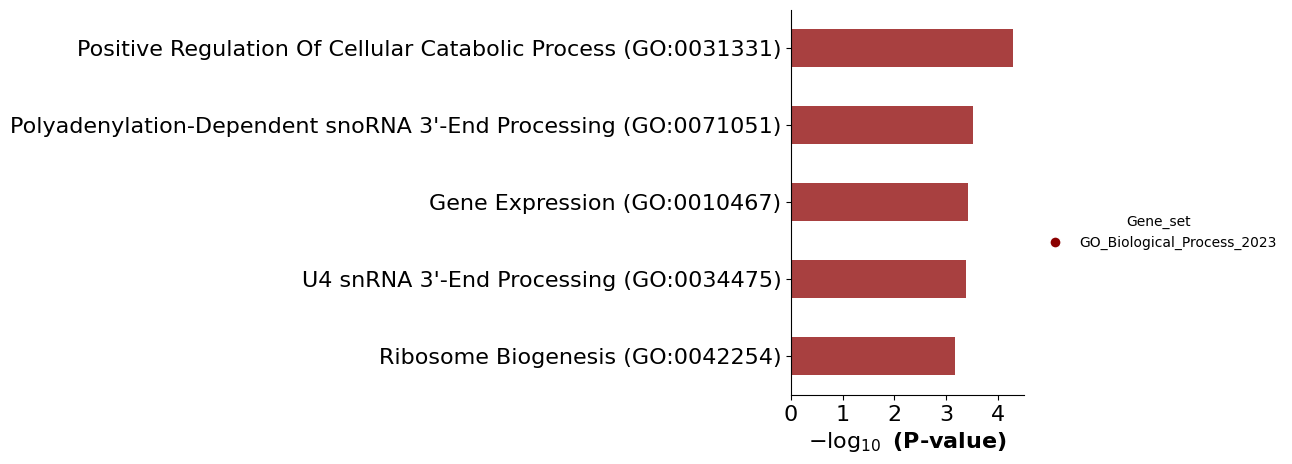

In [63]:
ax = barplot(enrich_result.results,
              column="P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              color='darkred', # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

# ISG+ Cd14 mono - split by BR1 and BR2

In [221]:
# Filter data
master_1 = master[(master['celltype'] == 'ISG+ CD14 monocyte') & 
                  (master['padj'] <= 0.1) & 
                  (master['type'] == 'DEGs_Male') &
                  ( master['Direction'] == 'BR2')]

# Extract gene list
gl = master_1['X']
print(gl)

215480      EVI2A
215482    CARHSP1
215488     RB1CC1
Name: X, dtype: object


In [222]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/ISG_CD14 monocyte_split_M_vs_F_upin_BR1_BR2/ISG_CD14 monocyte_DEGS_Male_UpinBR2_padj0.1.csv", index=False)


In [218]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Pathway_analysis/SourceData/ISG_CD14 monocyte_split_M_vs_F_upin_BR1_BR2/ISG_CD14 monocyte_DEGS_Female_UpinBR1_padj0.1.csv", index=False)


In [177]:
# assign a list object to enrichr
#gl = ['TRIM8', 'TP53INP1', 'ZSWIM8', 'FURIN', 'TRIM38', 'FOXO1']


enrich_result = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023')


In [178]:
enrich_result.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Second-Messenger-Mediated Signaling (GO:0019932),2/72,0.000972,0.052233,0,0,51.732468,358.845374,FCGR3A;NUDT4
1,GO_Biological_Process_2023,Calcium-Mediated Signaling (GO:0019722),2/85,0.001351,0.052233,0,0,43.601314,288.082644,FCGR3A;NUDT4
2,GO_Biological_Process_2023,Natural Killer Cell Degranulation (GO:0043320),1/5,0.003246,0.052233,0,0,416.312500,2385.602237,FCGR3A
3,GO_Biological_Process_2023,Glomerulus Vasculature Development (GO:0072012),1/5,0.003246,0.052233,0,0,416.312500,2385.602237,PECAM1
4,GO_Biological_Process_2023,Neutrophil Extravasation (GO:0072672),1/5,0.003246,0.052233,0,0,416.312500,2385.602237,PECAM1
5,GO_Biological_Process_2023,Positive Regulation Of Adipose Tissue Developm...,1/7,0.004542,0.052233,0,0,277.513889,1497.032601,SORL1
6,GO_Biological_Process_2023,Positive Regulation Of Endocytic Recycling (GO...,1/7,0.004542,0.052233,0,0,277.513889,1497.032601,SORL1
7,GO_Biological_Process_2023,Regulation Of Protein Localization To Early En...,1/8,0.005189,0.052233,0,0,237.857143,1251.416370,SORL1
8,GO_Biological_Process_2023,Positive Regulation Of Protein Localization To...,1/8,0.005189,0.052233,0,0,237.857143,1251.416370,SORL1
9,GO_Biological_Process_2023,Positive Regulation Of Protein Localization To...,1/8,0.005189,0.052233,0,0,237.857143,1251.416370,SORL1


In [174]:
from gseapy import barplot, dotplot

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


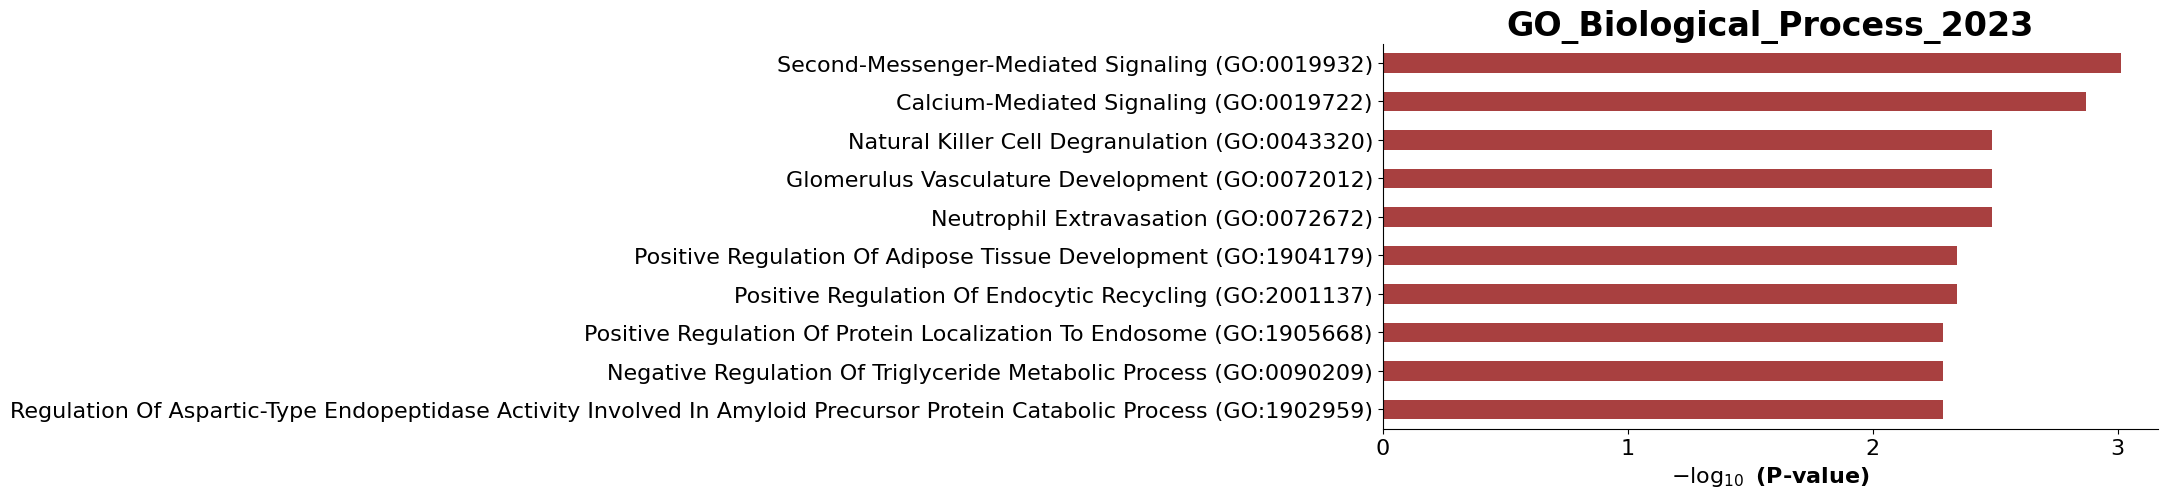

In [179]:
ax = barplot(enrich_result.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='darkred', column = 'P-value')